# Random Forest Algorithm to classify IRIS flower dataset

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)

In [22]:
column_names = ["sepal length in cm","sepal width in cm","petal length in cm","petal width in cm","class"]
iris=pd.read_csv("iris.data",names = column_names)
iris.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
iris["class"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

Scatter Plot

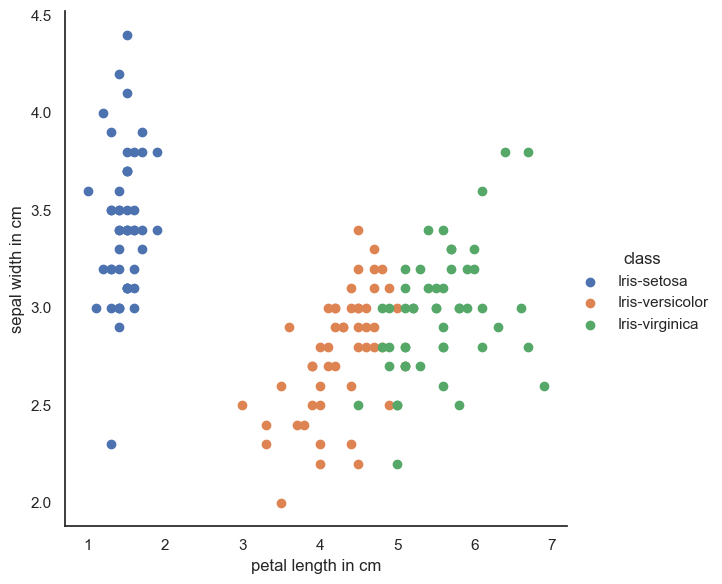

In [24]:
sns.FacetGrid(iris, hue="class", height=6).map(plt.scatter,"petal length in cm","sepal width in cm").add_legend()

In [25]:
flower_mapping = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
iris["class"] = iris["class"].map(flower_mapping)

In [26]:
iris.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Preparing inputs and outputs

In [27]:
x=iris[["sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm"]].values
y=iris[["class"]].values

Training and Testing Phase

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3)

Importing Random Forest Model

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
model = RandomForestClassifier(n_estimators=40)

In [32]:
model.fit(x_train,y_train.ravel())

RandomForestClassifier(n_estimators=40)

Model Accuracy

In [33]:
model.score(x_test,y_test)

0.9777777777777777

Confusion Matrix

In [34]:
y_predicted = model.predict(x_test)

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[11,  0,  0],
       [ 0, 16,  1],
       [ 0,  0, 17]], dtype=int64)

Text(47.25, 0.5, 'Truth')

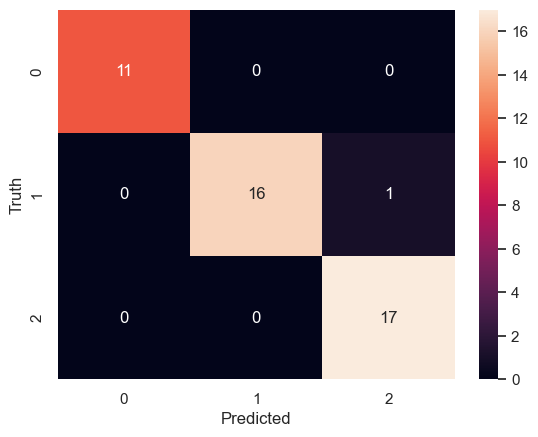

In [36]:
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")